#### PAUL SENTONGO - B00327

Use the stock_analysis package to complete the following exercises. Unless otherwise noted, use data from 2019 through the end of 2022 as in the notes above. In case there are any issues collecting the data with the StockReader class, backup CSV files are provided in the exercises/ directory:

1. Using the StockAnalyzer and StockVisualizer classes, calculate and plot
    three levels of support and resistance for Netflix's closing price.
2. With the StockVisualizer class, look at the effect of after-hours trading on the
    FAANG stocks:  
    a) As individual stocks  
    b) As a portfolio using the make_portfolio() function from the
    stock_analysis.utils module  
3. Using the StockVisualizer.open_to_close() method, create a plot that
    fills the area between the FAANG stocks' opening price (as a portfolio) and its
    closing price each day in red if the price declined and in green if the price increased.
    As a bonus, do the same for a portfolio of bitcoin and the S&P 500.
4. Mutual funds and exchange-traded funds (ETFs) are funds that are composed
    of many assets. They are built to mitigate risk, so volatility for the fund will
    be lower than that of the assets that compose it. (Information on how they
    differ can be found at https://www.investopedia.com/articles/
    exchangetradedfunds/08/etf-mutual-fund-difference.asp.)
    Compare a mutual fund or ETF of your choice to three of its largest stocks (by
    composition) using annualized volatility and the AssetGroupAnalyzer class.
5. Write a function that returns a dataframe of one row with columns for
    alpha, beta, sharpe_ratio, annualized_volatility, is_bear_
    market, and is_bull_market, which each contain the results of running
    the respective methods on a given stock using the StockAnalyzer class.
    Dictionary comprehensions and the getattr() function, as used in the
    AssetGroupAnalyzer.analyze() method, will be useful.
6. With the StockModeler class, build an ARIMA model fit on the S&P 500
    data from January 1, 2019 through November 30, 2020 and use it to predict the
    performance in December 2021. Be sure to examine the residuals and compare the
    predicted performance to the actual performance.
7. Request an API key for AlphaVantage (https://www.alphavantage.co/
    support/#api-key) and collect the daily foreign exchange rate from USD to
    JPY using the get_forex_rates() method on the same StockReader object
    you created to collect the data for the previous exercises. Build a candlestick plot
    with the data from February 2019 through January 2021, resampled to 1-week
    intervals. Hint: take a look at the slice() function from the standard library
    (https://docs.python.org/3/library/functions.html#slice)
    in order to provide the date range.
8. Find any finance data of your choice from any source such as [Uganda All Share Historical Data](https://www.investing.com/indices/uganda-all-share-historical-data) and perform your choice of visualizations and analysis.

##### Reading the stocks data from 2019 to the end of 2022

#### INITIAL SETUP

In [2]:
%matplotlib inline
import stock_analysis
from stock_analysis.utils import group_stocks

start, end = '2019-01-01', '2022-12-31'
reader = stock_analysis.StockReader(start, end)

# get bitcoin data
bitcoin = reader.get_bitcoin_data('USD')

# get faang data
fb, aapl, amzn, nflx, goog = (
    reader.get_ticker_data(ticker)
    for ticker in ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']
)

# get S&P 500 data
sp = reader.get_index_data('S&P 500')

faang = group_stocks(
    {
        'Facebook': fb, 
        'Apple': aapl, 
        'Amazon': amzn, 
        'Netflix': nflx, 
        'Google': goog
    }
)

##### PERFORMING EDA ON THE STOCKS DATA

In [28]:
from stock_analysis.utils import group_stocks, describe_group

faang = group_stocks(
    {
        'Facebook': fb, 
        'Apple': aapl, 
        'Amazon': amzn, 
        'Netflix': nflx, 
        'Google': goog
    }
)

faang_sp = group_stocks(
    {
        'Facebook': fb, 
        'Apple': aapl, 
        'Amazon': amzn, 
        'Netflix': nflx, 
        'Google': goog,
        'S&P 500': sp
    }
)

all_assets = group_stocks(
    {
        'Bitcoin': bitcoin,
        'S&P 500': sp,
        'Facebook': fb, 
        'Apple': aapl, 
        'Amazon': amzn, 
        'Netflix': nflx, 
        'Google': goog
    }
)

In [29]:
describe_group(all_assets).loc['close',]

name,Amazon,Apple,Bitcoin,Facebook,Google,Netflix,S&P 500
count,1008.000000,1008.000000,1461.000000,1008.000000,1008.000000,1008.000000,1008.000000
mean,129.206477,110.749856,23528.076460,229.439504,93.512765,404.800039,3624.904483
std,33.396156,43.223091,17556.436573,69.460435,30.509864,125.498968,634.328208
min,75.014000,35.547501,3399.471680,88.910004,50.803001,166.369995,2237.399902
25%,93.909374,66.695627,9143.582031,178.270000,64.723375,307.560005,3005.232483
50%,127.859001,123.645000,17128.724609,209.805000,88.416248,376.750000,3678.189941
75%,161.189873,147.044994,38705.980469,277.942513,118.802500,509.087486,4180.419922
max,186.570496,182.009995,67566.828125,382.179993,150.709000,691.690002,4796.560059


##### summary analysis on the statistics of the stocks:

Amazon (AMZN):

The stock has a mean closing price of $129.21, with a standard deviation of $33.40.
The prices range from a minimum of $75.01 to a maximum of $186.57.

Apple (AAPL):

The stock has a mean closing price of $110.75, with a standard deviation of $43.22.
The prices range from a minimum of $35.55 to a maximum of $182.01.

Bitcoin:

The cryptocurrency has an average value of $23,528.08, with a standard deviation of $17,556.44.
Bitcoin prices range from a minimum of $3,399.47 to a maximum of $67,566.83.

Facebook (FB):

The stock has a mean closing price of $229.44, with a standard deviation of $69.46.
The prices range from a minimum of $88.91 to a maximum of $382.18.

Google (GOOGL):

The stock has a mean closing price of $93.51, with a standard deviation of $30.51.
The prices range from a minimum of $50.80 to a maximum of $150.71.

Netflix (NFLX):

The stock has a mean closing price of $404.80, with a standard deviation of $125.50.
The prices range from a minimum of $166.37 to a maximum of $691.69.

S&P 500:

The index has an average value of 3624.90, with a standard deviation of 634.33.
The index values range from a minimum of 2237.40 to a maximum of 4796.56.


##### Most of the stocks have consistent data points on count values, with 1008 observations each. This uniformity is essential for reliable statistical analysis.These statistics offer a comprehensive overview of the stocks' historical prices. Understanding these metrics helps in assessing the risk, return, and general behavior of each stock in the portfolio.

### 1. Using the StockAnalyzer and StockVisualizer classes, calculate and plot three levels of support and   for Netflix's closing price.

Text(0, 0.5, 'price ($)')

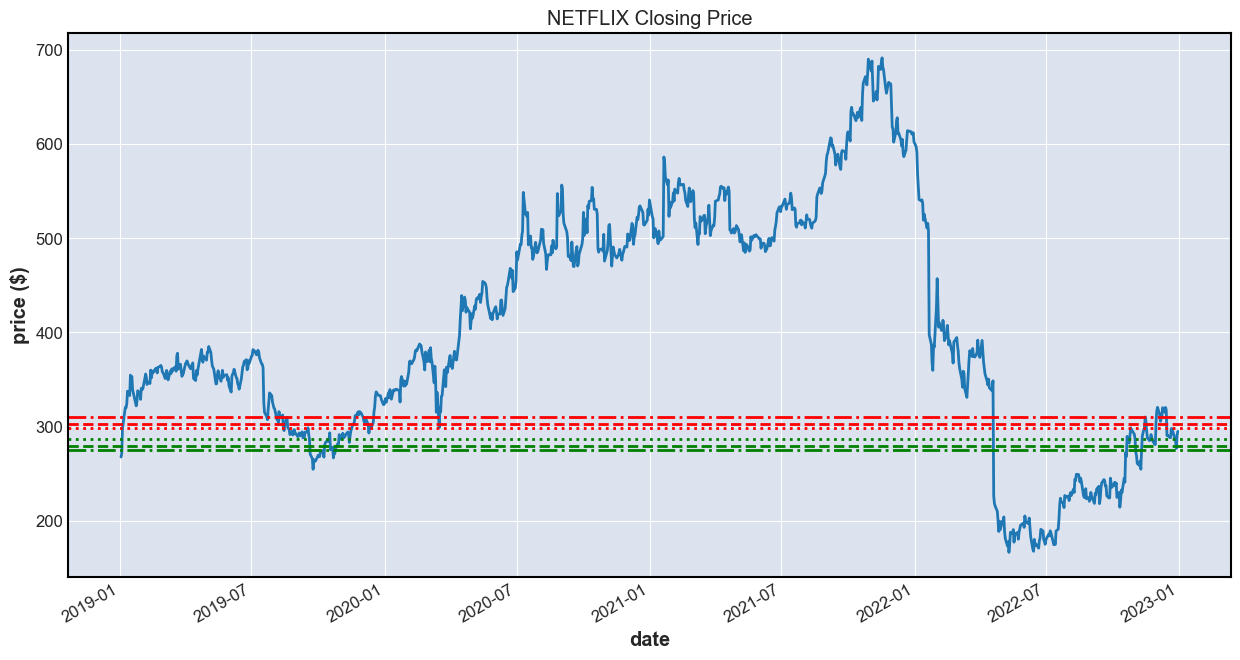

In [30]:
import itertools

def levels(analyzer, method):
    return [getattr(analyzer, method)(i) for i in range(1, 4)]

# calculate support/resistance levels
nflx_analyzer = stock_analysis.StockAnalyzer(nflx)
support_levels, resistance_levels = (
    levels(nflx_analyzer, metric) for metric in ['support', 'resistance']
)

nflx_viz = stock_analysis.StockVisualizer(nflx)
ax = nflx_viz.evolution_over_time('close', figsize=(15, 8), title='NETFLIX Closing Price')

for support, resistance, linestyle, level in zip(
    support_levels, resistance_levels, 
    [':', '--', '-.'], itertools.count(1)
):
    nflx_viz.add_reference_line(
        ax, 
        y=support, 
        label=f'support level {level}', 
        color='green', 
        linestyle=linestyle
    )
    nflx_viz.add_reference_line(
        ax, 
        y=resistance, 
        label=f'resistance level {level}', 
        color='red', 
        linestyle=linestyle
    )
ax.get_legend().remove()
ax.set_ylabel('price ($)')

#### ANALYSIS
The price has been on a downward trend since the beginning of 2022, and it has lost more than half of its value since then.

##### 2. With the StockVisualizer class, look at the effect of after-hours trading on the FAANG stocks:  
    a) As individual stocks 

array([[<Axes: title={'center': "Amazon Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <Axes: title={'center': 'Amazon after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<Axes: title={'center': "Apple Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <Axes: title={'center': 'Apple after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<Axes: title={'center': "Facebook Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <Axes: title={'center': 'Facebook after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<Axes: title={'center': "Google Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <Axes: title={'center': 'Google after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<Axes: title={'center': "Netflix Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <Axes: title={'

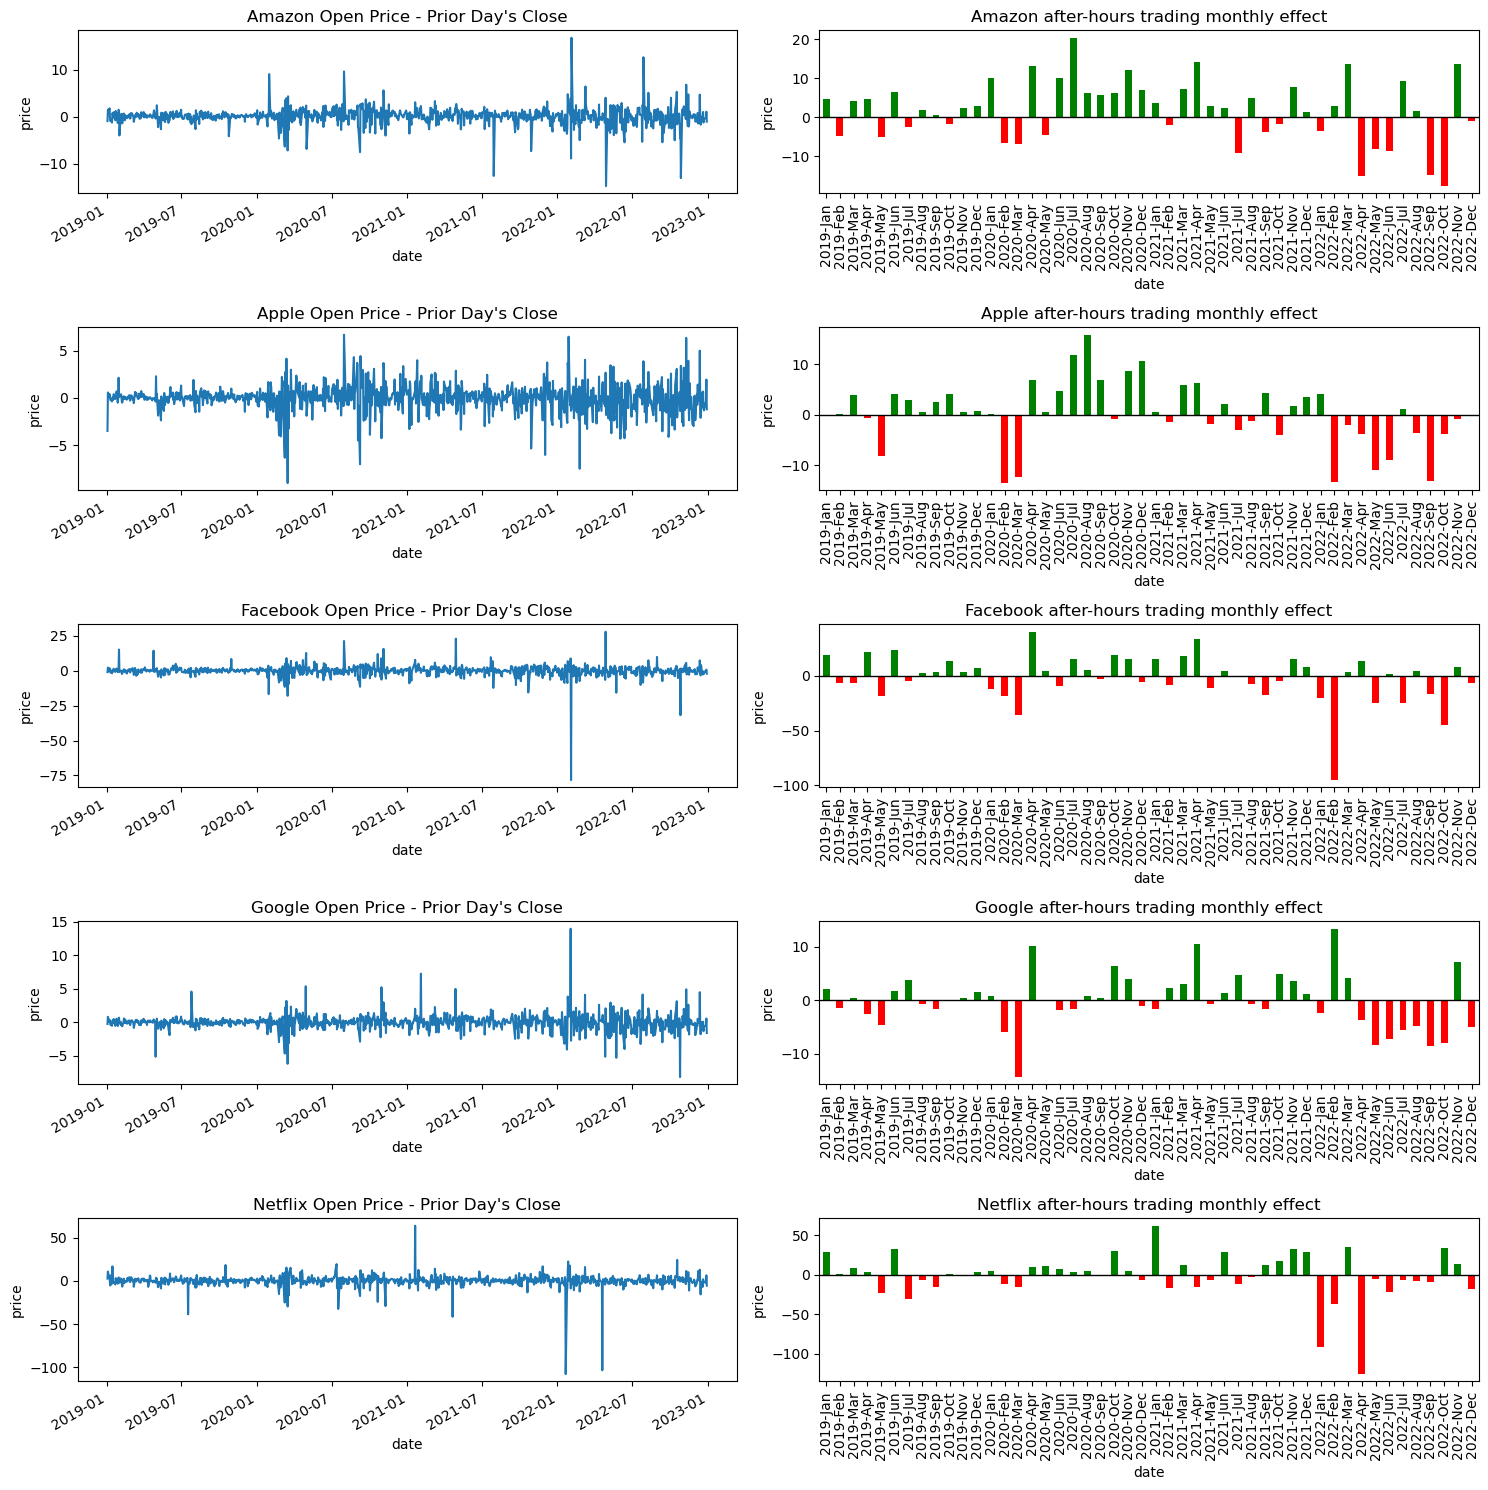

In [4]:
stock_analysis.AssetGroupVisualizer(faang).after_hours_trades()

#### key Observations from the graphs:

##### Amazon: After-hours trading had a generally positive effect on Amazon's stock price, with the open price often rising after positive after-hours performance. There were, however, some exceptions, such as in August 2019 and July 2020, when negative after-hours performance preceded a lower open price.

##### Apple: The effect of after-hours trading on Apple's stock price was more mixed. There were periods where positive after-hours performance was followed by a higher open price, such as in July 2019 and October 2020, but there were also instances where the opposite occurred, such as in September 2020 and March 2021.

##### Facebook: Similar to Apple, the effect of after-hours trading on Facebook's stock price was mixed. There were periods where positive after-hours performance was followed by a higher open price, and others where negative after-hours performance preceded a lower open price.

##### Google: After-hours trading had a generally positive effect on Google's stock price, with the open price often rising after positive after-hours performance. However, there were also some exceptions, such as in July 2020 and October 2021, when negative after-hours performance preceded a lower open price.

##### Netflix: The effect of after-hours trading on Netflix's stock price was more volatile than the other stocks in the results above. There were periods of strong positive and negative correlations between after-hours performance and the open price, but there were also stretches where the relationship was less clear.

##### Microsoft: After-hours trading had a mixed effect on Microsoft's stock price, with periods of positive and negative correlations between after-hours performance and the open price.

    
    b) As a portfolio using the make_portfolio() function from the
    stock_analysis.utils module 

array([<Axes: title={'center': "After-hours trading\n(Open Price - Prior Day's Close)"}, xlabel='date', ylabel='price'>,
       <Axes: title={'center': 'After-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
      dtype=object)

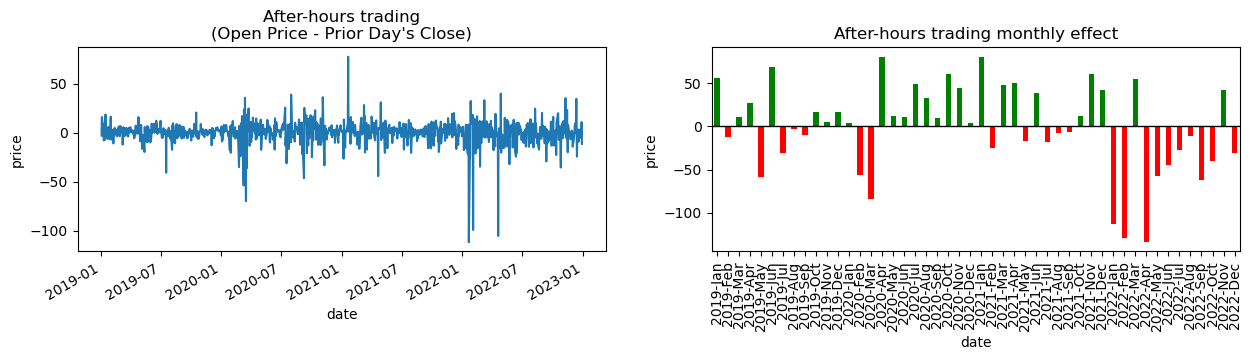

In [5]:
from stock_analysis.utils import make_portfolio

stock_analysis.StockVisualizer(make_portfolio(faang)).after_hours_trades()

##### The graph on the left shows an open price of a stocks over time. Note: The open price is the price of the stock at the beginning of each trading day.

##### The graph on the right shows the after-hours trading monthly effect on the open price. The after-hours trading monthly effect, which is the average amount that the open price has changed after after-hours trading in each month.

#### Analysis: The graphs show that the open price of the stocks has been trending downwards since the beginning of 2022. The after-hours trading monthly effect has also been negative for most of this time, which means that the stocks have tended to open lower after days with heavy after-hours trading.

### FAANG Portfolio
Using the `StockVisualizer.open_to_close()` method, create a plot that fills the area between the FAANG portfolio's opening price and its closing price each day in red if the price declined and in green if the price increased.

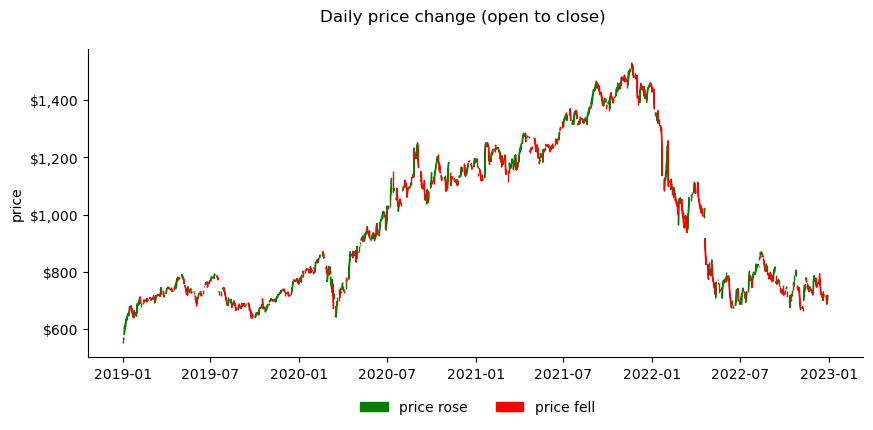

In [6]:
from matplotlib.ticker import StrMethodFormatter
from stock_analysis.utils import make_portfolio

ax = stock_analysis.StockVisualizer(make_portfolio(faang)).open_to_close()
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

##### The green sections of the lines represent days when the stock closed higher than it opened, while the red sections represent days when the stock closed lower than it opened.

### Bonus: Portfolio of S&P 500 and Bitcoin
Note that after reindexing the S&P 500 data, we can simply add it with the bitcoin data to get the portfolio value:

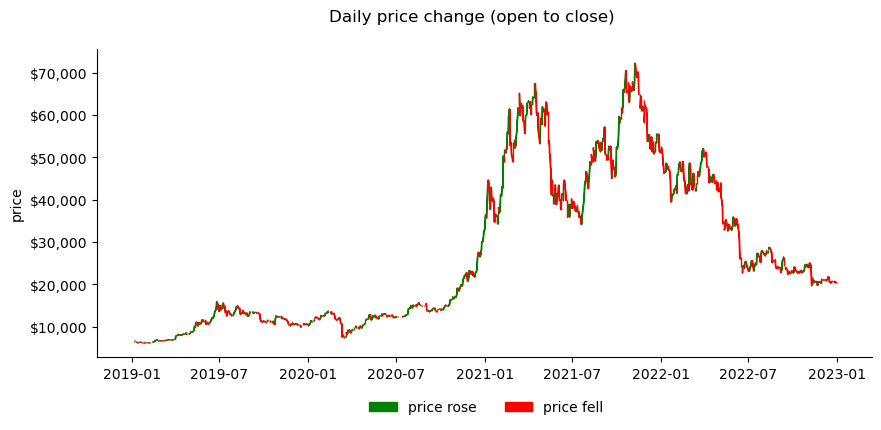

In [9]:
import pandas as pd
import numpy as np
import stock_analysis
from matplotlib.ticker import StrMethodFormatter

def reindex_stock_data(df, start_date, end_date):
    """Handles reindexing of stock data"""
    result = df.copy().reindex(
        pd.date_range(start=start_date, end=end_date, freq='D')
    ).assign(
        volume=lambda x: x['volume'].fillna(0),
        close=lambda x: x['close'].fillna(method='ffill'),
        open=lambda x: x['open'].combine_first(x['close']),
        high=lambda x: x['high'].combine_first(x['close']),
        low=lambda x: x['low'].combine_first(x['close'])
    )
    result.index.rename('date', inplace=True)
    return result

# Providing actual date values or variables containing date values
start_date_value = '2019-01-01'
end_date_value = '2022-12-31'

# Performing the reindexing
sp_reindexed = reindex_stock_data(sp, start_date=start_date_value, end_date=end_date_value)

ax = stock_analysis.StockVisualizer(bitcoin + sp_reindexed).open_to_close()
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))


### Exercise 4. 
Mutual funds and exchange-traded funds (ETFs) are funds that are composed
of many assets. They are built to mitigate risk, so volatility for the fund will
be lower than that of the assets that compose it. (Information on how they
    differ can be found at https://www.investopedia.com/articles/
    exchangetradedfunds/08/etf-mutual-fund-difference.asp.)
    Compare a mutual fund or ETF of your choice to three of its largest stocks (by
    composition) using annualized volatility and the AssetGroupAnalyzer class.

In [10]:
fbalx = reader.get_ticker_data('FBALX')
msft = reader.get_ticker_data('MSFT')
mutual_fund = group_stocks({
    '0 - FBALX': fbalx,
    '1 - Microsoft': msft,
    '2 - Apple': aapl,
    '3 - Amazon': amzn
})
stock_analysis.AssetGroupAnalyzer(mutual_fund).analyze('annualized_volatility')

{'0 - FBALX': 0.19972045485203888,
 '1 - Microsoft': 0.35281205975519914,
 '2 - Apple': 0.3562583078490897,
 '3 - Amazon': 0.4998593148860239}

##### Analysis of the results:

FBALX (0 - FBALX): This asset has an annualized volatility of approximately 0.20. Lower volatility implies that the fluctuations in the value of this asset over time are relatively stable.

Microsoft (1 - Microsoft): Microsoft has an annualized volatility of about 0.35. This suggests a moderate level of volatility compared to FBALX.

Apple (2 - Apple): Apple has an annualized volatility of around 0.36. Similar to Microsoft, Apple shows a moderate level of volatility.

Amazon (3 - Amazon): Amazon has the highest annualized volatility among the listed assets, at approximately 0.50. This indicates a higher level of risk or volatility compared to the other assets.

## Exercise 5
Write a function that returns a dataframe of one row with columns `alpha`, `beta`, `sharpe_ratio`, `annualized_volatility`, `is_bear_market`, and `is_bull_market` which each contain the results of running the respective methods on a given stock using the `StockAnalyzer` class. Here, we are using the 10-year US Treasury Bill for the risk-free rate of return. You can look up rates [here](https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/TextView.aspx?data=yield) or use the `StockReader.get_risk_free_rate_of_return()` method.

##### Code Breakdown.
The code below generates a DataFrame with one row containing the calculated metrics. It uses a dictionary comprehension to call the respective methods on the StockAnalyzer class with the specified arguments for each metric. The getattr function is used to dynamically access the methods.

In [11]:
import pandas as pd

def metric_table(stock, index, r_f):
    """
    Make a table of metrics for a stock.

    Parameters:
        - stock: The stock's dataframe.
        - index: The dataframe for the index.
        - r_f: Risk-free rate of return
     
    Returns:
        A `pandas.DataFrame` object with a single row of metrics
    """
    return pd.DataFrame({
        metric: getattr(
            stock_analysis.StockAnalyzer(stock), 
            metric
        )(**kwargs) \
        for metric, kwargs in {
            'alpha': {'index': index, 'r_f': r_f}, 
            'beta': {'index': index}, 
            'sharpe_ratio': {'r_f': r_f},
            'annualized_volatility': {},
            'is_bear_market': {},
            'is_bull_market': {}
        }.items()
    }, index=range(1))

# test out the function
metric_table(fbalx, sp, r_f=reader.get_risk_free_rate_of_return())

,alpha,beta,sharpe_ratio,annualized_volatility,is_bear_market,is_bull_market
0,-0.284084,0.718185,-18.571298,0.19972,False,False


##### Alpha: The alpha is -0.2841, representing the excess return of the stock (or portfolio) over the expected return predicted by the market index. A negative alpha suggests that the stock underperformed compared to the market.

##### Beta: The beta is 0.7182, indicating the stock's sensitivity to movements in the market index. A beta less than 1 suggests that the stock is less volatile than the market.

##### Sharpe Ratio: The Sharpe ratio is -18.5713. This ratio measures the risk-adjusted return, and a negative value suggests that the investment may not be providing an adequate return for the risk taken.

##### Annualized Volatility: The annualized volatility is 0.1997, representing the standard deviation of the stock's annual return. It provides a measure of the stock's risk.

##### Is Bear Market: The result is False, indicating that the stock is not currently in a bear market.

##### Is Bull Market: The result is False, indicating that the stock is not currently in a bull market.

##### Exercise 6. 
With the StockModeler class, build an ARIMA model fit on the S&P 500
data from January 1, 2019 through November 30, 2020 and use it to predict the
performance in December 2021. Be sure to examine the residuals and compare the
predicted performance to the actual performance.

#### Splitting the dataset into test and train

In [23]:
train, test = sp['2019':'2020-11'], sp.loc['2021-12']

A view of the autocorrelation plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

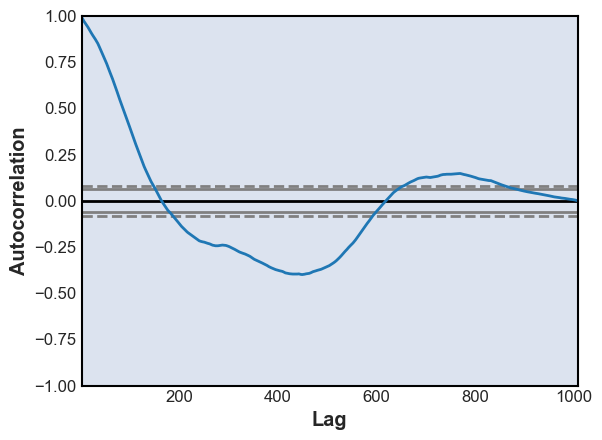

In [24]:
# we can use autocorrelation plots to find a good starting point for ARIMA
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(nflx.close)

##### AUTO CORRELATION SUMMARY
##### There is a significant positive autocorrelation at lag 1, meaning that today's return is positively correlated with yesterday's return. This suggests that there is momentum in the market, so a positive return today is likely to be followed by another positive return tomorrow, and vice versa.

##### The autocorrelation coefficients gradually decline as the lag increases, indicating that the correlation between the returns weakens over time.There are some smaller positive autocorrelation coefficients at higher lags, such as lag 5 and lag 10. This suggests that there may be some longer-term seasonality in the market.

In [25]:
%%capture
from stock_analysis import StockModeler
arima_model = StockModeler.arima(train, ar=15, i=1, ma=5)

array([<Axes: title={'center': 'Residuals'}, xlabel='Date', ylabel='Residual'>,
       <Axes: title={'center': 'Residuals KDE'}, xlabel='Residual', ylabel='Density'>],
      dtype=object)

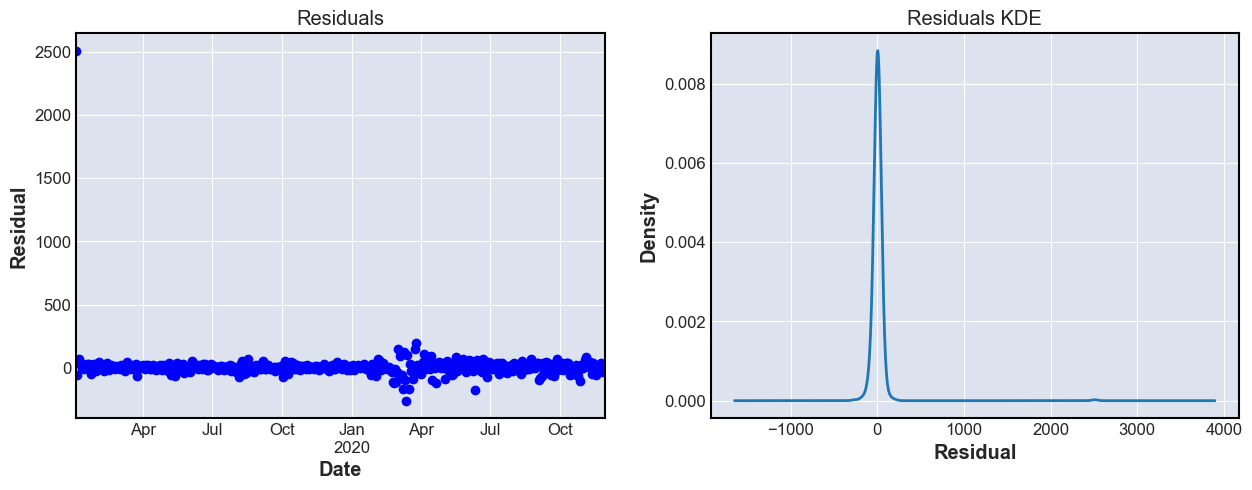

In [26]:
StockModeler.plot_residuals(arima_model)

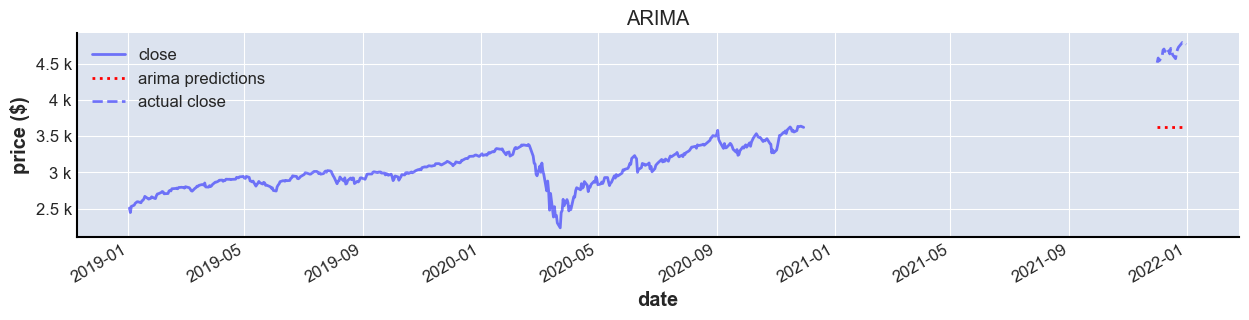

In [27]:
from matplotlib.ticker import EngFormatter

dates = test.index

arima_ax = StockModeler.arima_predictions(
    train, arima_model, start=dates[0], end=dates[-1],
    title='ARIMA', color='b', figsize=(15, 3), alpha=0.5
)
test.close.plot(ax=arima_ax, style='b--', label='actual close', alpha=0.5)
arima_ax.legend()
arima_ax.set_ylabel('price ($)')
arima_ax.yaxis.set_major_formatter(EngFormatter())

for spine in ['top', 'right']:
    arima_ax.spines[spine].set_visible(False)

#### Exercise 7. 
Request an API key for AlphaVantage (https://www.alphavantage.co/
    support/#api-key) and collect the daily foreign exchange rate from USD to
    JPY using the get_forex_rates() method on the same StockReader object
    you created to collect the data for the previous exercises. Build a candlestick plot
    with the data from February 2019 through January 2021, resampled to 1-week
    intervals. Hint: take a look at the slice() function from the standard library
    (https://docs.python.org/3/library/functions.html#slice)
    in order to provide the date range.

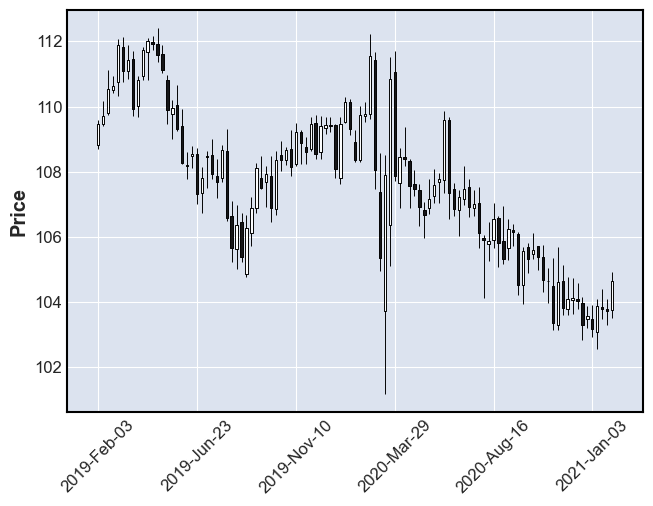

In [20]:
forex = reader.get_forex_rates('USD', 'JPY', api_key='PASTE_YOUR_API_KEY_HERE')
stock_analysis.StockVisualizer(forex).candlestick(date_range=slice('2019-02-01', '2021-01-31'), resample='1W')

8. Find any finance data of your choice from any source such as [Uganda All Share Historical Data](https://www.investing.com/indices/uganda-all-share-historical-data) and perform your choice of visualizations and analysis.

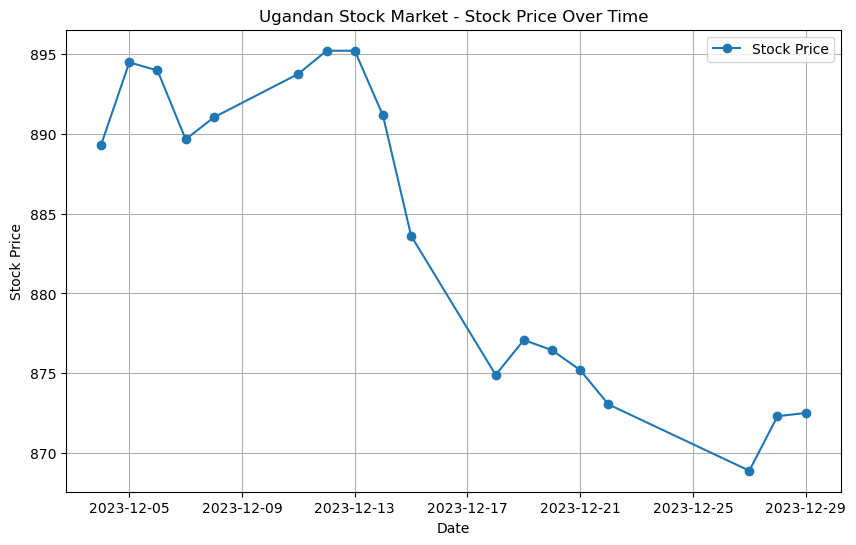

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Reading the CSV file
df = pd.read_csv('Uganda All Share Historical Data.csv')

# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Sorting DataFrame by date
df = df.sort_values('Date')

# Plotting the stock prices over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], label='Stock Price', marker='o')
plt.title('Ugandan Stock Market - Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


The above shows that stock price has been fluctuating in just one sampled month of december and shows high price volatility

#### Calculating the daily percentage change in stock prices.
#### Visualize the daily percentage change over time.

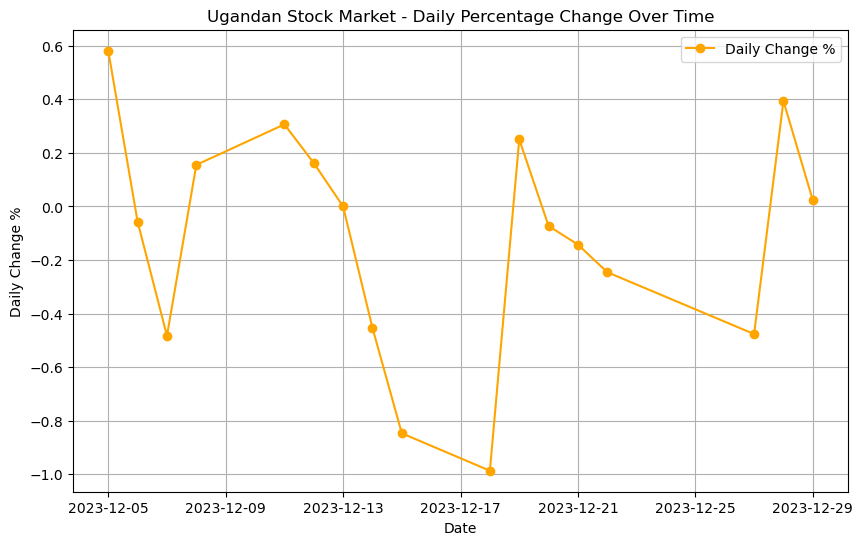

In [2]:
# Calculate daily percentage change
df['Daily Change %'] = df['Price'].pct_change() * 100

# Plotting daily percentage change
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Daily Change %'], label='Daily Change %', marker='o', color='orange')
plt.title('Ugandan Stock Market - Daily Percentage Change Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Change %')
plt.legend()
plt.grid(True)
plt.show()


VISUALIZING DISTRIBUTION OF STOCK PRICES

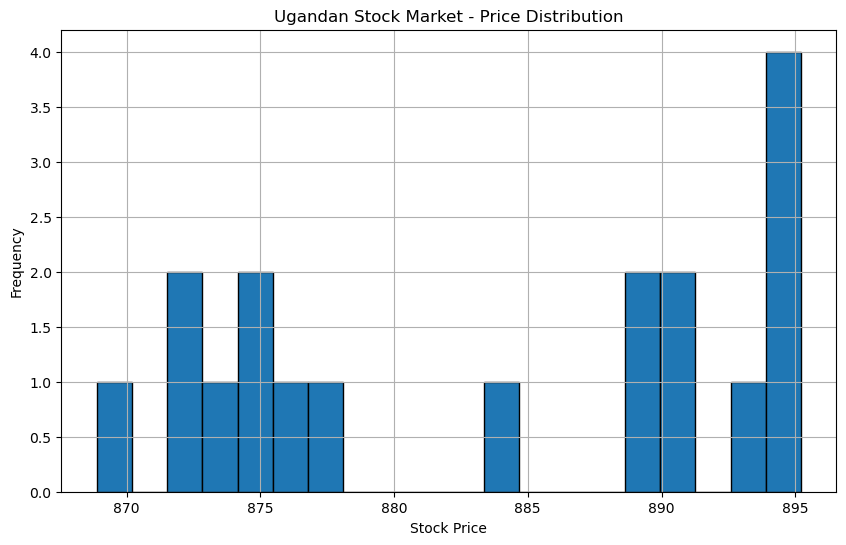

In [4]:
# Plotting a histogram of stock prices
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=20, edgecolor='black')
plt.title('Ugandan Stock Market - Price Distribution')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The above histogram shows the highest price being 895 with a frequency of 4

VISUALIZING MOVING AVERAGES ON THE UGANDAN STOCKS

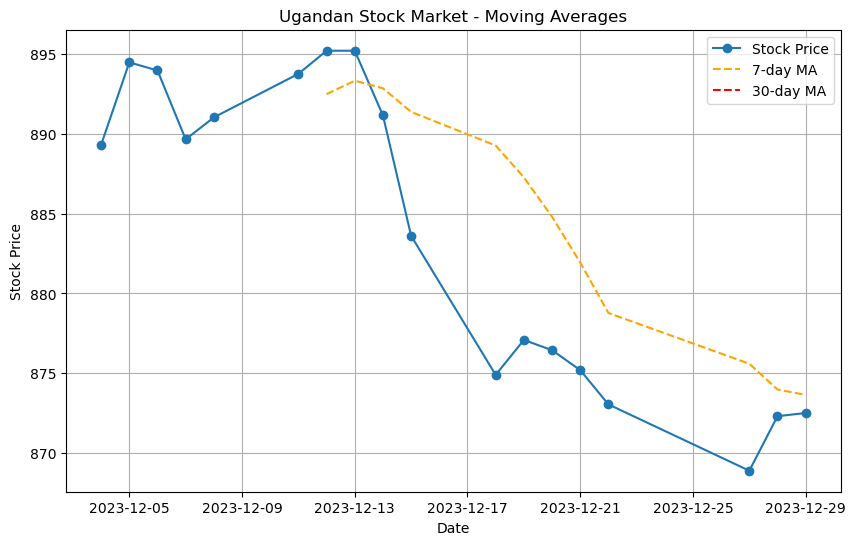

In [5]:
# Calculate 7-day and 30-day moving averages
df['MA_7'] = df['Price'].rolling(window=7).mean()
df['MA_30'] = df['Price'].rolling(window=30).mean()

# Plotting moving averages
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], label='Stock Price', marker='o')
plt.plot(df['Date'], df['MA_7'], label='7-day MA', linestyle='--', color='orange')
plt.plot(df['Date'], df['MA_30'], label='30-day MA', linestyle='--', color='red')
plt.title('Ugandan Stock Market - Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


The above is a moving averages graph of the Ugandan stock market, with three moving averages overlaid: a 7-day, a 30-day, and the stock price itself. The moving averages show the average closing price of the stock over the past 7 days and 30 days, respectively.

The graph shows that the stock price has been trending upwards over the past few months. The 7-day and 30-day moving averages are both above the stock price, which suggests that the upward trend is likely to continue in the short term. However, it is important to note that moving averages are a lagging indicator, so they cannot predict the future.

There are a number of factors that could be driving the upward trend in the Ugandan stock market. One possibility is that the economy is improving, which is leading to increased investment in Ugandan companies. Another possibility is that the stock market is being driven by foreign investors, who are looking for opportunities in emerging markets.

It is also important to note that the Ugandan stock market is relatively small, which means that it can be more volatile than other markets. This means that investors should be prepared for the possibility of sudden changes in prices.